<a href="https://colab.research.google.com/github/manishsahu001/AI-ML-DL/blob/main/Clusterning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# K Means Clustering

In [ ]:
# make_blobs generates any of dataset.
# Creating cluster - data will be 500, centers=3 means we need 3 clusters and the cluster standar deviation will be 0.60
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42)

In [ ]:
# Converting the X data into dataframe
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [ ]:
# apply standard scaler
# The dataset is distance based so we need to standard scaling this
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
# To store WCSS value
inertia = []
# We will test 1 to 11 cluster to check the curve
K_range = range(1, 11)

In [ ]:
for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  # Traning the data
  kmeans.fit(X_scaled)
  # adding wcss value into the interia array
  inertia.append(kmeans.inertia_)


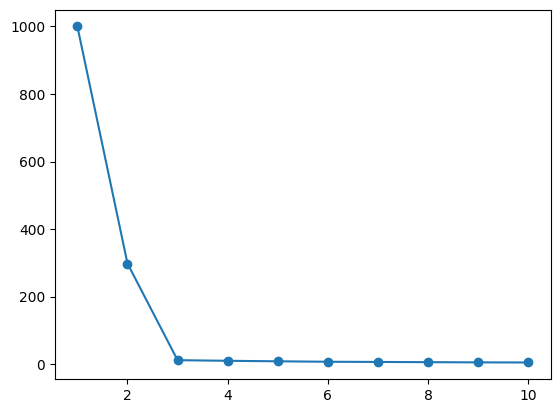

In [ ]:
# Visualize inertia
plt.plot(K_range, inertia, marker='o')

In [ ]:
# creating final k mean cluster - clustering algorithmg
kmeans_final = KMeans(n_clusters=3, random_state=42)

In [ ]:
# Adding the label into this cluster
cluster_label = kmeans_final.fit_predict(X_scaled)

In [ ]:
# Creating a new column for cluster
df['cluster'] = cluster_label

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

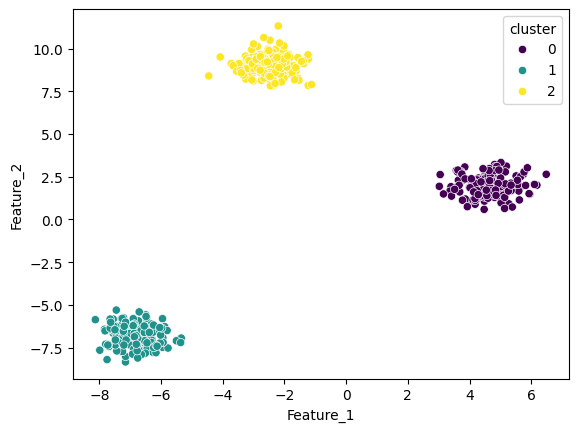

In [ ]:
# Visulization of the cluster
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['cluster'], palette='viridis')

# DB Scan Clustering

In [ ]:
# We will use make_moon to generate the dataset
from sklearn.datasets import make_moons

In [ ]:
# generating the total 500 data sample, noise=0.05 means the distance betweeen the data points
X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# making feature 1 feature 2 using make moons
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [ ]:
# Applying standar scaler
X_scaled = scaler.fit_transform(df)

In [ ]:
# Applying DB Scan here eps=0.3 is the disance, min_samples=5 means atleast 5 data points should be there.
# Creating DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.3, min_samples=5)
# getting label
dbscan_labels = dbscan.fit_predict(X_scaled)

In [ ]:
# Creating new column for the dbscan_lables
df['dbscan_cluster'] = dbscan_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

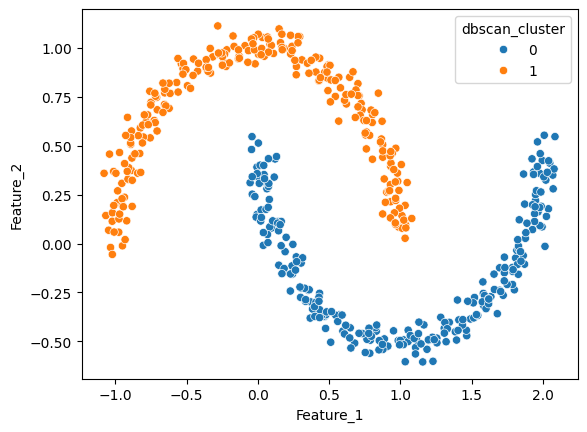

In [ ]:
# Visualization
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['dbscan_cluster'], palette='tab10')

In [ ]:
# Visualize same dataset with the K-means to see the problem
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [ ]:
df['kmeans_cluster'] = kmeans_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

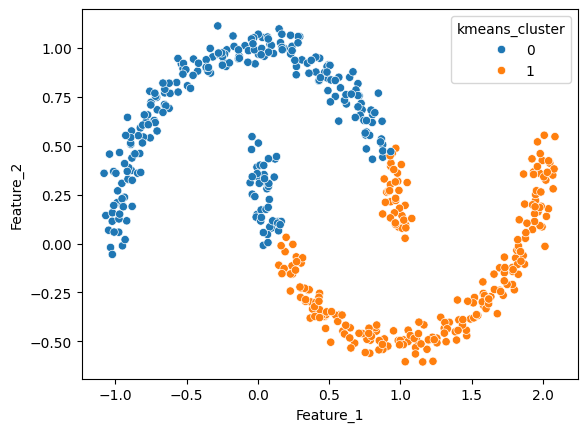

In [ ]:
# Visualize in scatter plot
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['kmeans_cluster'], palette='tab10')

# PCA